In [1]:
using Luxor
using Colors
using Plots
using IterTools
using DataFrames
using OpenStreetMapX
using LightOSM
using KernelDensity
using Parsers
using Downloads
using OSMToolset
include("../kernel_density.jl")
include("../distance.jl")
include("../prepare_data.jl")
include("../analyse.jl")
include("../plots.jl")
include("../transform.jl")
include("../tile_regression.jl")
include("../kernel_density.jl")

kernel_density (generic function with 1 method)

In [2]:
scrape_config = "../poi_config_test.csv"
scr = OSMToolset.ScrapePOIConfig(DataFrame(CSV.File(scrape_config)))

ScrapePOIConfig{AttractivenessMetaPOI} with 54 keys:
 No │ key               values                             group          infl ⋯
────┼───────────────────────────────────────────────────────────────────────────
  1 │ aeroway           aerodrome,terminal                 transport           ⋯
  2 │ amenity           arts_centre,theatre                entertainment
  3 │ amenity           atm,bank                           shopping
  4 │ amenity           bar,pub                            entertainment
  5 │ amenity           bus_station                        transport           ⋯
  6 │ amenity           cafe,ice_cream                     cafe
  7 │ amenity           cinema                             cinema
  8 │ amenity           clinic,dentist,doctors             healthcare
  9 │ amenity           college,university                 universities        ⋯
 10 │ amenity           fast_food                          fast_food
 11 │ amenity           food_court                         

In [3]:
city = "Warszawa"
admin_level = "6"
search_area = 1000
attr = :education
wilderness_distance = 300
shape = "rectangle"
calculate_percent = true
num_of_points = 30
distance_sectors = 200.0
scrape_config = "../poi_config_test.csv"
num_of_sectors = 100
ncols=10
nrows=10

10

In [4]:
points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
                    city, #city_name
                    admin_level, #admin_level
                    search_area, #search_area
                    attr, #attr
                    wilderness_distance, #wilderness_distance
                    shape, #shap;
                    distance_sectors=300,
                    rectangle_boundaries= get_city_bounds(city,admin_level),
                    #calculate_percent = calculate_percent,
                    #num_of_points = num_of_points,
                    scrape_config = scrape_config,
                    in_admin_bounds=false)
attr_heat = matrix_log_scaling(attr_heat)


String: "ErrorException(\"Error parsing document : 0\"), syntax error, 1, 1, 1"

In [5]:
data = prepare_city_map(city, #city_name
            admin_level, #admin_level
            search_area, #search_area
            attr, #attr
            wilderness_distance, #wilderness_distance
            shape, #shap;
            distance_sectors=300,
            rectangle_boundaries= get_city_bounds(city,admin_level),
            #calculate_percent = calculate_percent,
            #num_of_points = num_of_points,
            scrape_config = scrape_config,
            in_admin_bounds=false)

MethodError: MethodError: no method matching prepare_city_map(::String, ::String, ::Int64, ::Symbol, ::Int64, ::String; distance_sectors::Int64, rectangle_boundaries::Dict{String, Float64}, scrape_config::String, in_admin_bounds::Bool)

Closest candidates are:
  prepare_city_map(::String, ::String, ::Int64, ::Any, ::Any; calculate_percent, distance_sectors, num_of_points, num_of_sectors, scrape_config, calculate_attractiveness, distance, rectangle_boundaries, in_admin_bounds, dir)
   @ Main ~/Julia/map_analyses/map_analyses/prepare_data.jl:311


In [ ]:
city_centre = data[2]

In [ ]:
road_types = ["motorway", "trunk", "primary", "secondary", 
                "tertiary", "residential", "service", "living_street",
                "motorway_link", "trunk_link", "primary_link", "secondary_link", 
                "tertiary_link"]    

In [ ]:
tiles = generate_tiles(city,admin_level,ncols,nrows)

In [ ]:
tls,xs,ys = calc_all_tiles_length(city,city_centre,road_types,tiles,10,10)

In [ ]:
tile_plot(data[5],tls,xs,ys)

In [10]:
#extract_tiles(city,ncols,nrows,"tiles/")
#bounds, density, fl_xs, fl_ys = get_tile_values_from_files(city,ncols,nrows,"tiles/",road_types)

In [86]:
tile_plot(data[5], density, fl_xs, fl_ys)

UndefVarError: UndefVarError: `fl_xs` not defined

In [12]:
attr_xs,attr_ys, tile_attrs = agregate_values_in_tiles(points_heat,attr_heat,tiles,city_centre)

([-10624.369201110818 -7745.1886121103125 -7745.1886121103125 -10624.369201110818; -10617.946330069753 -7740.501751537733 -7740.501751537733 -10617.946330069753; … ; 15172.279115350853 18021.84937529026 18021.84937529026 15172.279115350853; 15163.03486653075 18010.858178934 18010.858178934 15163.03486653075], [-14910.930176718666 -14910.930176718666 -11908.605766341672 -11908.605766341672; -11903.292177257947 -11903.292177257947 -8900.948034651703 -8900.948034651703; … ; 9162.576574461607 9162.576574461607 12179.92301291199 12179.92301291199; 12170.320576334692 12170.320576334692 15187.67229113123 15187.67229113123], Any[0.7828113623350478, 0.04990935955980128, 1.6509182573816565, 3.590654168450354, 1.7688953760036703, 1.9053872235018785, 0.7142459852755481, 1.1662686896416044, 0.8630914196828839, 1.196716534097766  …  3.0040884375325128, 1.8527420243650634, 0.5937045603750254, 1.0141599807469075, 2.3602877087679732, 2.481493524551441, 1.3159446492679086, 0.5915204640682282, 1.55685892

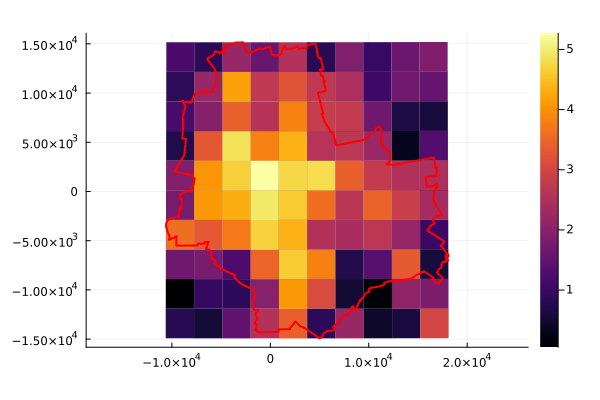

In [87]:
tile_plot(data[5], tile_attrs, attr_xs, attr_ys)

In [14]:
#plot_heatmap(points_heat,attr_heat,bounds_heat,"education","Warsaw",1000,300)

In [15]:
#kd = kernel_density(data,"education")

In [16]:
#plot_heatmap(data[1], 
#            kd, 
#            data[5], 
#            :education, 
#            "Warsaw",
#            search_area,
#            wilderness_distance)

In [40]:
xss = [col for col in eachrow(xs)]
yss = [col for col in eachrow(ys)]

100-element Vector{SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}:
 [-14910.930176718666, -14910.930176718666, -11908.605766341672, -11908.605766341672]
 [-11903.292177257947, -11903.292177257947, -8900.948034651703, -8900.948034651703]
 [-8895.637660990118, -8895.637660990118, -5893.274457558676, -5893.274457558676]
 [-5887.967300513232, -5887.967300513232, -2885.5857076904886, -2885.5857076904886]
 [-2880.2817684537845, -2880.2817684537845, 122.117542309031, 122.117542309031]
 [127.41826254456961, 127.41826254456961, 3129.834619771697, 3129.834619771697]
 [3135.1321198144315, 3135.1321198144315, 6137.564852007277, 6137.564852007277]
 [6142.859130665882, 6142.859130665882, 9145.307566305295, 9145.307566305295]
 [9150.598622390382, 9150.598622390382, 12153.062089933483, 12153.062089933483]
 [12158.34992225501, 12158.34992225501, 15160.827750138329, 15160.827750138329]
 ⋮
 [-11891.263214730701, -11891.263214730701, -8873.972607058466, -8873.972

In [48]:
vls = DataFrame(
                lengths = tls,
                attr = tile_attrs)

Row,lengths,attr
,Any,Any
1,83296.6,0.782811
2,96847.7,0.0499094
3,76617.8,1.65092
4,1.68061e5,3.59065
5,1.08017e5,1.7689
6,65385.5,1.90539
7,55876.0,0.714246
8,31134.4,1.16627
9,68263.3,0.863091


In [49]:
coords = DataFrame(
    min_east = [i[1] for i in xss],
    max_east = [i[2] for i in xss],
    min_north = [i[1] for i in yss],
    max_north = [i[4] for i in yss]
)

Row,min_east,max_east,min_north,max_north
,Float64,Float64,Float64,Float64
1,-10624.4,-7745.19,-14910.9,-11908.6
2,-10617.9,-7740.5,-11903.3,-8900.95
3,-10611.5,-7735.81,-8895.64,-5893.27
4,-10605.1,-7731.12,-5887.97,-2885.59
5,-10598.7,-7726.43,-2880.28,122.118
6,-10592.2,-7721.74,127.418,3129.83
7,-10585.8,-7717.04,3135.13,6137.56
8,-10579.4,-7712.34,6142.86,9145.31
9,-10572.9,-7707.65,9150.6,12153.1


In [50]:
CSV.write("attr_length.csv",vls)

"attr_length.csv"

In [51]:
CSV.write("coords.csv",coords)

"coords.csv"

In [39]:
xss

4-element Vector{SubArray{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}:
 [-10624.369201110818, -10617.946330069753, -10611.521072208554, -10605.093428942851, -10598.663401688145, -10592.230991860975, -10585.796200878183, -10579.359030157062, -10572.91948111605, -10566.477555173667  …  15246.110143153484, 15236.893238368471, 15227.672908465336, 15218.449155474664, 15209.221981428776, 15199.99138835969, 15190.757378300841, 15181.519953286097, 15172.279115350853, 15163.03486653075]
 [-7745.1886121103125, -7740.501751537733, -7735.813150948019, -7731.122811374014, -7726.430733848507, -7721.73691940513, -7717.041369078244, -7712.344083901893, -7707.645064910943, -7702.944313140729  …  18109.632887237593, 18098.674170980274, 18087.71138625182, 18076.74453546773, 18065.77362104318, 18054.798645395116, 18043.819610940795, 18032.836520099427, 18021.84937529026, 18010.858178934]
 [-7745.1886121103125, -7740.501751537733, -7735.813150948019, -7731.122811374014,

In [19]:
tile_attrs

100-element Vector{Any}:
 0.7828113623350478
 0.04990935955980128
 1.6509182573816565
 3.590654168450354
 1.7688953760036703
 1.9053872235018785
 0.7142459852755481
 1.1662686896416044
 0.8630914196828839
 1.196716534097766
 ⋮
 1.8527420243650634
 0.5937045603750254
 1.0141599807469075
 2.3602877087679732
 2.481493524551441
 1.3159446492679086
 0.5915204640682282
 1.556858922317994
 1.8590922047809069

In [59]:
dim1, dim2 = size(xs)
LLA_matrix = [LLA(0.0,0.0,0.0) for _ in 1:dim1, _ in 1:dim2]
for i in 1:dim1
    for j in 1:dim2
        LLA_matrix[i,j] = LLA(ENU(xs[i,j],ys[i,j],0.0),city_centre)
    end
end

In [82]:
south_lat = []
north_lat = []
west_lng = []
east_lng = []

for pol in 1:dim1
    push!(south_lat, minimum([i.lat for i in LLA_matrix[pol,:]]))
    push!(north_lat, maximum([i.lat for i in LLA_matrix[pol,:]]))
    push!(west_lng, minimum([i.lon for i in LLA_matrix[pol,:]]))
    push!(east_lng, maximum([i.lon for i in LLA_matrix[pol,:]]))
end

In [84]:
LLA_coords = DataFrame(
    south_lat = south_lat,
    north_lat = north_lat,
    west_lng = west_lng,
    east_lng = east_lng    
)

Row,south_lat,north_lat,west_lng,east_lng
,Any,Any,Any,Any
1,52.0979,52.1249,20.8516,20.8937
2,52.1249,52.1519,20.8516,20.8937
3,52.1519,52.1789,20.8516,20.8937
4,52.1789,52.206,20.8516,20.8937
5,52.206,52.233,20.8516,20.8937
6,52.233,52.26,20.8516,20.8937
7,52.26,52.2871,20.8516,20.8937
8,52.2871,52.3141,20.8516,20.8937
9,52.3141,52.3411,20.8516,20.8937


In [85]:
CSV.write("LLA_coords.csv",LLA_coords)

"LLA_coords.csv"

In [ ]:
coords = DataFrame(
    min_east = [i[1] for i in xss],
    max_east = [i[2] for i in xss],
    min_north = [i[1] for i in yss],
    max_north = [i[4] for i in yss]
)